In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

C:\Users\melissa\Anaconda2\envs\work_virt\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = sm.datasets.macrodata.load_pandas().data

In [3]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [5]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [6]:
df.index = index
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


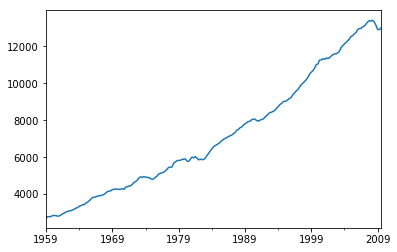

In [7]:
df['realgdp'].plot()

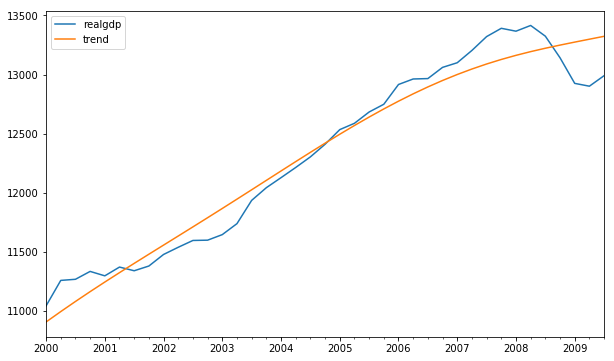

In [8]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])
df['trend'] = gdp_trend
df[['realgdp', 'trend']]['2000-03-01':].plot(figsize=(10,6))

In [9]:
airline = pd.read_csv('airline_passengers.csv', index_col="Month")

In [10]:
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


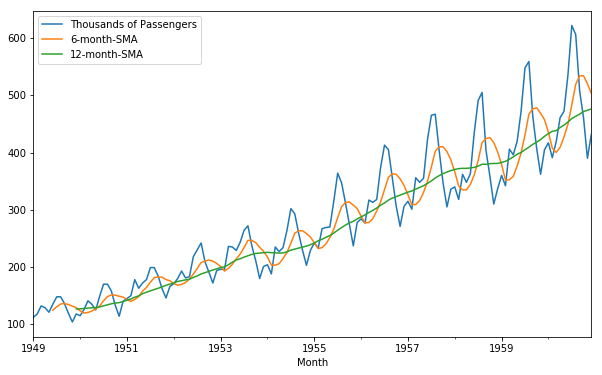

In [11]:
#SMA - Simple Move Average
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline.plot(figsize=(10,6))

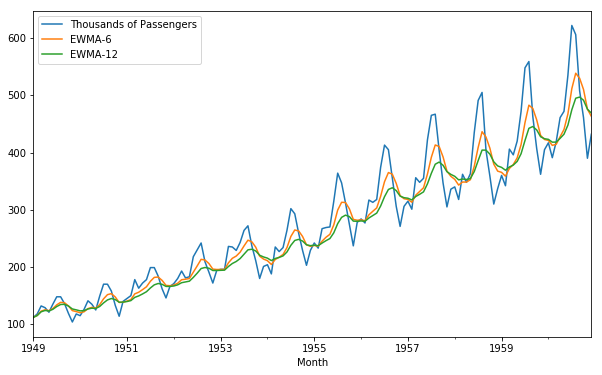

In [12]:
#EWMA - Exponentially-weight move average
airline['EWMA-6'] = airline['Thousands of Passengers'].ewm(span=6).mean()
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers', 'EWMA-6', 'EWMA-12']].plot(figsize=(10,6))

## ETS Models  - Error Trend Seasonality

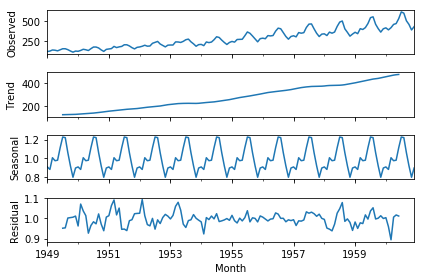

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model="multiplicative")
fig = result.plot()

# Arima Models - AutoRegressive Integrated Moving

In [14]:
df_milk = pd.read_csv('monthly-milk-production-pounds-p.csv')
df_milk.tail()
df_milk.drop(168, axis=0, inplace=True)

In [15]:
df_milk.columns = ['Month', 'Milk in Pound per Cow']
df_milk.head()

,Month,Milk in Pound per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [16]:
df_milk['Month'] = pd.to_datetime(df_milk['Month'])
df_milk.set_index('Month', inplace=True)
df_milk.head()

,Milk in Pound per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


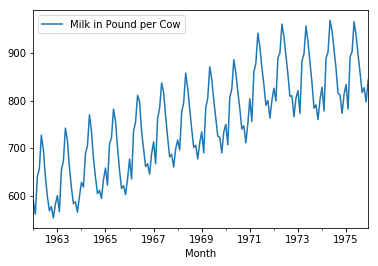

In [17]:
df_milk.plot()

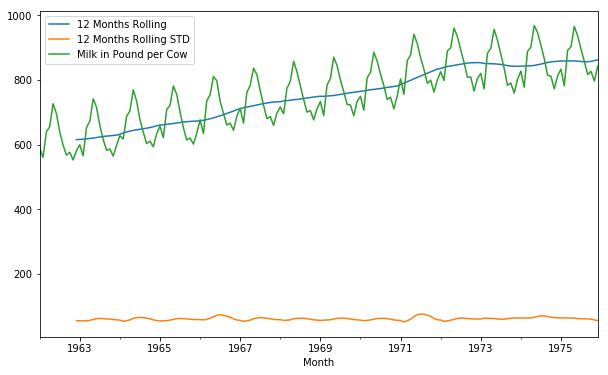

In [18]:
time_series = df_milk['Milk in Pound per Cow']
time_series.rolling(12).mean().plot(label='12 Months Rolling', figsize=(10,6))
time_series.rolling(12).std().plot(label='12 Months Rolling STD', figsize=(10,6))
time_series.plot()
plt.legend()

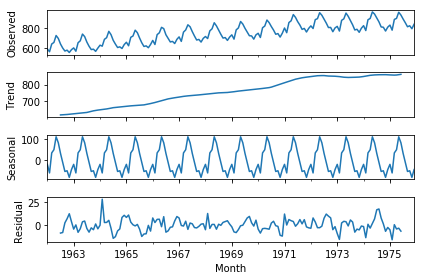

In [19]:
decomp = seasonal_decompose(time_series)
fig = decomp.plot()

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
result = adfuller(df_milk['Milk in Pound per Cow'])
print(result)

(-1.303811587422133, 0.62742670860303007, 13, 154, {'1%': -3.4735425281962091, '5%': -2.880497674144038, '10%': -2.5768780536346769}, 1115.1730447395112)


In [23]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Argument Dicky-fuller Test")
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations']
    
    for value, label in zip(result, labels):
        print(label + ": " + str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence of against null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence of against null hypothesis")
        print("Data has a unit root, it is non-stationary")
        
adf_check(df_milk['Milk in Pound per Cow'])

Argument Dicky-fuller Test
ADF Test Statistic: -1.30381158742
p-value: 0.627426708603
# of lags: 13
Num of Observations: 154
Weak evidence of against null hypothesis
Data has a unit root, it is non-stationary


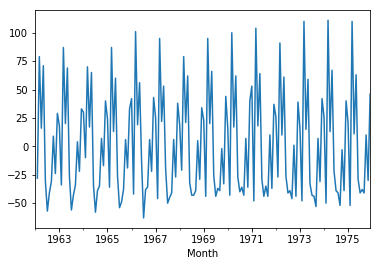

In [24]:
df_milk['First Difference'] = df_milk['Milk in Pound per Cow'] - df_milk['Milk in Pound per Cow'].shift(1)
df_milk['First Difference'].plot()

In [25]:
adf_check(df_milk['First Difference'].dropna())

Argument Dicky-fuller Test
ADF Test Statistic: -3.05499555865
p-value: 0.0300680040018
# of lags: 14
Num of Observations: 152
Strong evidence of against null hypothesis
Data has no unit root and is stationary


In [26]:
df_milk['Second Difference'] = df_milk['First Difference'] - df_milk['First Difference'].shift(1)

In [27]:
adf_check(df_milk['Second Difference'].dropna())

Argument Dicky-fuller Test
ADF Test Statistic: -14.3278736456
p-value: 1.11269893321e-26
# of lags: 11
Num of Observations: 154
Strong evidence of against null hypothesis
Data has no unit root and is stationary


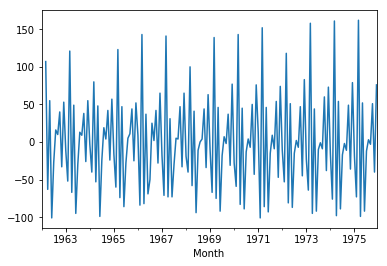

In [28]:
df_milk['Second Difference'].plot()

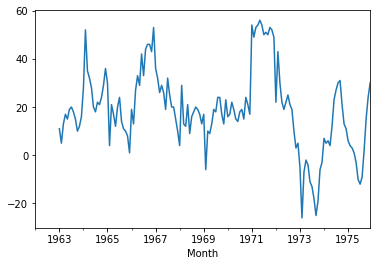

In [29]:
df_milk['Seasonal Difference'] = df_milk['Milk in Pound per Cow'] - df_milk['Milk in Pound per Cow'].shift(12)
df_milk['Seasonal Difference'].plot()

In [30]:
adf_check(df_milk['Seasonal Difference'].dropna())

Argument Dicky-fuller Test
ADF Test Statistic: -2.33541931436
p-value: 0.160798805277
# of lags: 12
Num of Observations: 143
Weak evidence of against null hypothesis
Data has a unit root, it is non-stationary


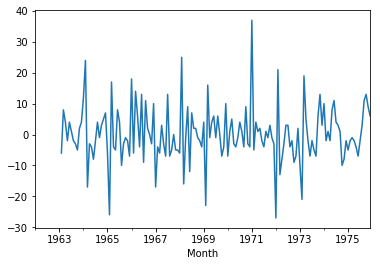

In [31]:
df_milk['Seasonal First Difference'] = df_milk['First Difference'] - df_milk['First Difference'].shift(12)
df_milk['Seasonal First Difference'].plot()

In [32]:
adf_check(df_milk['Seasonal First Difference'].dropna())

Argument Dicky-fuller Test
ADF Test Statistic: -5.03800227492
p-value: 1.86542343188e-05
# of lags: 11
Num of Observations: 143
Strong evidence of against null hypothesis
Data has no unit root and is stationary


# AutoCorrelationPlots and Partial AutoCorrelationPlots

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

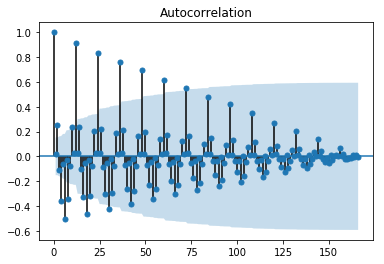

In [35]:
fig_first = plot_acf(df_milk['First Difference'].dropna())

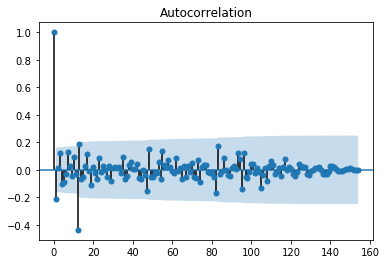

In [36]:
fig_seasonal_first = plot_acf(df_milk['Seasonal First Difference'].dropna())

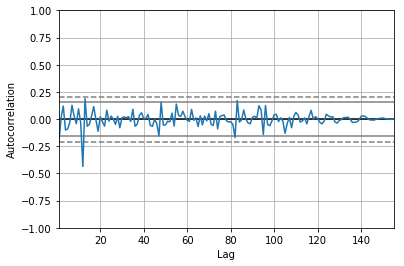

In [37]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_milk['Seasonal First Difference'].dropna())

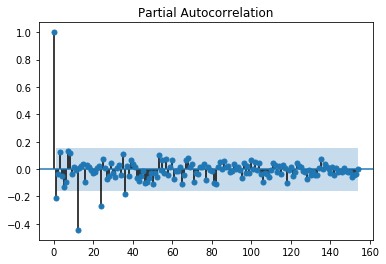

In [39]:
res = plot_pacf(df_milk['Seasonal First Difference'].dropna())